In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

from scipy.stats import ttest_ind, f_oneway

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
xlsx = pd.read_excel('empirical_data.xlsx', sheet_name=None)

In [3]:
xlsx[list(xlsx.keys())[0]]

,Dashboard,red_still,green_still,blue_still,white_still,red_flash,green_flash,blue_flash,white_flash
0,1,7.0,1.4,1.0,2.4,0.9,0.7,0.7,1.6
1,2,1.3,1.3,1.5,1.6,0.9,1.4,0.9,10.3
2,3,0.9,13.4,0.7,1.1,0.7,0.7,0.8,0.9
3,4,1.6,9.0,1.8,8.6,1.2,2.2,1.5,2.2
4,5,1.4,0.7,1.9,0.8,0.8,0.9,1.2,1.1


In [4]:
df_compiled = pd.DataFrame()
cols = xlsx[list(xlsx.keys())[0]].columns
n_cols = []
for sheet in xlsx:
    n_cols.extend([i + '_' + sheet.lower() for i in cols[1:]])
    df_compiled = pd.concat([df_compiled, xlsx[sheet].iloc[:, 1:]], axis=1)
df_compiled.columns = n_cols

In [5]:
df_compiled.head()

,red_still_dashboard,green_still_dashboard,blue_still_dashboard,white_still_dashboard,red_flash_dashboard,green_flash_dashboard,blue_flash_dashboard,white_flash_dashboard,red_still_b_pillar,green_still_b_pillar,...,blue_flash_b_pillar,white_flash_b_pillar,red_still_floor,green_still_floor,blue_still_floor,white_still_floor,red_flash_floor,green_flash_floor,blue_flash_floor,white_flash_floor
0,7.0,1.4,1.0,2.4,0.9,0.7,0.7,1.6,1.0,0.8,...,0.8,0.7,1.6,1.3,0.9,6.3,0.9,0.7,0.9,1.2
1,1.3,1.3,1.5,1.6,0.9,1.4,0.9,10.3,1.1,0.7,...,1.1,1.3,2.0,1.1,1.1,2.2,0.7,0.9,0.8,0.8
2,0.9,13.4,0.7,1.1,0.7,0.7,0.8,0.9,0.7,0.7,...,0.5,1.0,0.8,0.8,0.7,0.9,0.8,0.9,0.8,1.2
3,1.6,9.0,1.8,8.6,1.2,2.2,1.5,2.2,0.9,1.0,...,0.7,0.9,1.1,0.9,0.9,0.9,0.7,0.8,0.7,0.9
4,1.4,0.7,1.9,0.8,0.8,0.9,1.2,1.1,0.9,1.1,...,0.8,0.9,1.2,1.0,1.2,1.7,0.8,0.8,0.7,8.2


In [6]:
df_compiled.sample(5,axis=1)

,white_still_floor,white_flash_b_pillar,green_flash_dashboard,red_still_dashboard,blue_flash_b_pillar
0,6.3,0.7,0.7,7.0,0.8
1,2.2,1.3,1.4,1.3,1.1
2,0.9,1.0,0.7,0.9,0.5
3,0.9,0.9,2.2,1.6,0.7
4,1.7,0.9,0.9,1.4,0.8


In [7]:
df_compiled.mean(axis=1)

0    1.512500
1    1.850000
2    1.358333
3    1.754167
4    1.437500
dtype: float64

In [8]:
def get_data_by_keyword(df, keyword):
    cols = [i for i in df.columns if i.endswith(keyword)]
    return df[cols]

def add_text(ax, nums):
    '''Adds value counts above ax bars with given num counts
    :param ax: seaborn axes object
    :param nums: list of labels for the axes bars
    
    :return: none
    '''
    for i,p in enumerate(ax.patches):
        ax.text(p.get_x() + p.get_width()/2.,
                p.get_height() + 0.1,
                nums[i],
                ha='center')

In [9]:
get_data_by_keyword(df_compiled, 'b_pillar')

,red_still_b_pillar,green_still_b_pillar,blue_still_b_pillar,white_still_b_pillar,red_flash_b_pillar,green_flash_b_pillar,blue_flash_b_pillar,white_flash_b_pillar
0,1.0,0.8,1.2,0.9,0.7,0.7,0.8,0.7
1,1.1,0.7,0.8,8.8,1.0,0.8,1.1,1.3
2,0.7,0.7,0.9,1.3,0.7,0.7,0.5,1.0
3,0.9,1.0,1.3,0.8,0.7,0.8,0.7,0.9
4,0.9,1.1,0.8,4.0,0.8,0.8,0.8,0.9


In [10]:
v_flash = df_compiled[[i for i in df_compiled.columns if i.find('flash') != -1]].values.flatten()
v_still = df_compiled[[i for i in df_compiled.columns if i.find('still') != -1]].values.flatten()

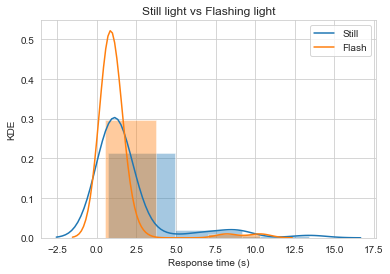

In [30]:
f = sns.distplot(v_still, bins=3,
             kde_kws={'label':'Still'})
sns.distplot(v_flash, bins=3,
             kde_kws={'label':'Flash'})
f.set_title('Still light vs Flashing light')
f.set_xlabel('Response time (s)')
f.set_ylabel('KDE')
# f.get_figure().savefig('./Images/empirical_lights/report/light_mode.png')
None

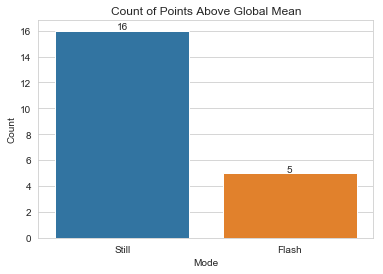

In [12]:
overall_mean = df_compiled.mean(axis=0).mean()
s_count = len(v_still[v_still > overall_mean])
f_count = len(v_flash[v_flash > overall_mean])
f = sns.barplot(x=['Still', 'Flash'], y=[s_count, f_count])
f.set_title('Count of Points Above Global Mean')
f.set_xlabel('Mode')
f.set_ylabel('Count')
add_text(f, [s_count, f_count])
f.get_figure().savefig('./Images/empirical_lights/report/still_vs_flash_mean.png')
None

In [13]:
db = get_data_by_keyword(df_compiled, 'dashboard')
bp = get_data_by_keyword(df_compiled, 'b_pillar')
fl = get_data_by_keyword(df_compiled, 'floor')
db.columns = ['_'.join(i.split('_')[:2]) for i in db.columns]
bp.columns = ['_'.join(i.split('_')[:2]) for i in bp.columns]
fl.columns = ['_'.join(i.split('_')[:2]) for i in fl.columns]
db['type'] = 'dash'
bp['type'] = 'b_pillar'
fl['type'] = 'floor'
long = pd.concat([db,bp,fl])

In [14]:
long.mean(axis=0).values

array([1.56666667, 2.34666667, 1.11333333, 2.82      , 0.82      ,
       0.92      , 0.86      , 2.21333333])

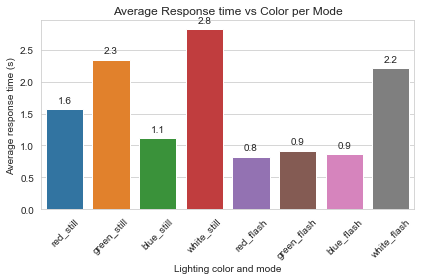

In [24]:
f = sns.barplot(x=long.columns[:-1], y=long.mean(axis=0).values)
[i.set_rotation(45) for i in f.get_xticklabels()]
add_text(f, [round(i, 1) for i in long.mean(axis=0).values])
f.set_title('Average Response time vs Color per Mode')
f.set_xlabel('Lighting color and mode')
f.set_ylabel('Average response time (s)')
f = f.get_figure()
f.tight_layout()
f.savefig('./Images/empirical_lights/report/response_per_color_mode.png')
None

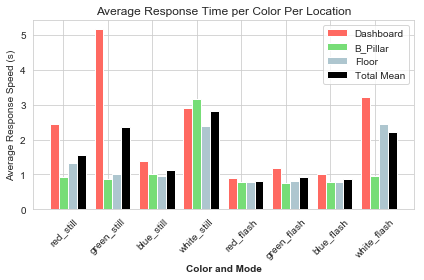

In [21]:
# ref: https://python-graph-gallery.com/11-grouped-barplot/
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = db.mean(axis=0).values
bars2 = bp.mean(axis=0).values
bars3 = fl.mean(axis=0).values
bars4 = long.mean(axis=0).values
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#ff6961', width=barWidth, edgecolor='white', label='Dashboard')
plt.bar(r2, bars2, color='#77dd77', width=barWidth, edgecolor='white', label='B_Pillar')
plt.bar(r3, bars3, color='#aec6cf', width=barWidth, edgecolor='white', label='Floor')
plt.bar(r4, bars4, color='#000000', width=barWidth, edgecolor='white', label='Total Mean')
 
# Add xticks on the middle of the group bars
plt.xlabel('Color and Mode', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], db.columns, rotation=45)
plt.ylabel('Average Response Speed (s)')
plt.title('Average Response Time per Color Per Location')
# Create legend & Show graphic
plt.legend()
plt.tight_layout()
plt.savefig('./Images/empirical_lights/report/response_per_color_per_location.png')

In [17]:
r = df_compiled[[i for i in df_compiled.columns if i.startswith('red')]]
g = df_compiled[[i for i in df_compiled.columns if i.startswith('green')]]
b = df_compiled[[i for i in df_compiled.columns if i.startswith('blue')]]
w = df_compiled[[i for i in df_compiled.columns if i.startswith('white')]]


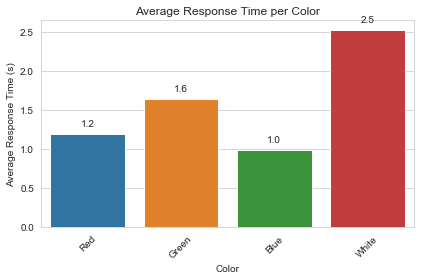

In [25]:
y_vals = [np.mean(r.values), np.mean(g.values), np.mean(b.values), np.mean(w.values)]
f = sns.barplot(x=['Red', 'Green', 'Blue', 'White'], 
                y=y_vals)
[i.set_rotation(45) for i in f.get_xticklabels()]
add_text(f, [round(i, 1) for i in y_vals])
f.set_title('Average Response Time per Color')
f.set_xlabel('Color')
f.set_ylabel('Average Response Time (s)')
f = f.get_figure()
f.tight_layout()
f.savefig('./Images/empirical_lights/report/response_time_per_color.png')
None

In [40]:
db.iloc[:,:-1].values.flatten().mean()

2.275

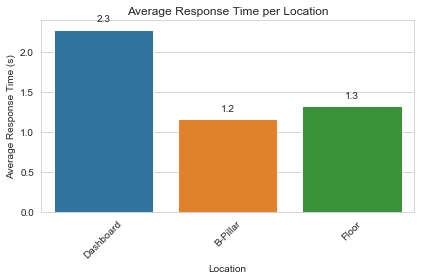

In [42]:
y_vals = [db.iloc[:,:-1].values.flatten().mean(), 
          bp.iloc[:,:-1].values.flatten().mean(), 
          fl.iloc[:,:-1].values.flatten().mean()]
f = sns.barplot(x=['Dashboard', 'B-Pillar', 'Floor'], 
                y=y_vals)
[i.set_rotation(45) for i in f.get_xticklabels()]
add_text(f, [round(i, 1) for i in y_vals])
f.set_title('Average Response Time per Location')
f.set_xlabel('Location')
f.set_ylabel('Average Response Time (s)')
f = f.get_figure()
f.tight_layout()
f.savefig('./Images/empirical_lights/report/response_time_per_location.png')
None

In [43]:
mode_t, mode_p = ttest_ind(v_still, v_flash)

location_F, location_p = f_oneway(db.iloc[:, :-1].values.flatten(), 
                                  bp.iloc[:, :-1].values.flatten(), 
                                  fl.iloc[:, :-1].values.flatten())

location_t_nd, location_p_nd = ttest_ind(bp.iloc[:, :-1].values.flatten(), 
                                         fl.iloc[:, :-1].values.flatten())

color_F, color_p = f_oneway(r.values.flatten(), 
                            g.values.flatten(), 
                            b.values.flatten(), 
                            w.values.flatten())

color_F_nw, color_p_nw = f_oneway(r.values.flatten(), 
                                  g.values.flatten(), 
                                  b.values.flatten())

In [44]:
print('t statistic for still vs flashing is: {:.3f}'.format(mode_t))
print('p value for still vs flashing is : {:.3f}'.format(mode_p))
print('~~~~')
print('F statistic for car location is: {:.3f}'.format(location_F))
print('p value for car location is: {:.3f}'.format(location_p))
print('~~~~')
print('F statistic for car location without the dash is: {:.3f}'.format(location_t_nd))
print('p value for car location without the dash is: {:.3f}'.format(location_p_nd))
print('~~~~')
print('F statistic for indicator color is: {:.3f}'.format(color_F))
print('p value for indicator color is: {:.3f}'.format(color_p))
print('~~~~')
print('F statistic for indicator color without white is: {:.3f}'.format(color_F_nw))
print('p value for indicator color without white is: {:.3f}'.format(color_p_nw))

t statistic for still vs flashing is: 2.006
p value for still vs flashing is : 0.047
~~~~
F statistic for car location is: 3.477
p value for car location is: 0.034
~~~~
F statistic for car location without the dash is: -0.538
p value for car location without the dash is: 0.592
~~~~
F statistic for indicator color is: 3.329
p value for indicator color is: 0.022
~~~~
F statistic for indicator color without white is: 1.139
p value for indicator color without white is: 0.325
